In [1]:
import numpy as np
import matplotlib.pyplot as plt


Уравнение теплопроводности


$
U_t = U_{xx} \\
U(0,x) = sin(x) \\
U_{xx} = \frac{U(t,x+\Delta x)-2U(t,x)+U(t,x-\Delta x)}{{\Delta x}^2} \\
U_t = \frac{U(t+\Delta t,x) - U(t,x)}{\Delta t} \\
U^{j+1}_i = U^j_i +\frac{\Delta t}{{\Delta x}^2}(U^j_{i+1}-2U^j_i+U^j_{i-1})
$

$
U(t,x) = e^{-t}sin(x)
$

In [489]:
f = lambda t,x: np.exp(-t)*np.sin(x)


In [4]:
x = np.linspace(0,2*np.pi,30)
t = np.linspace(0,1,30)

In [5]:
T,X = np.meshgrid(t,x)
U = f(T,X)

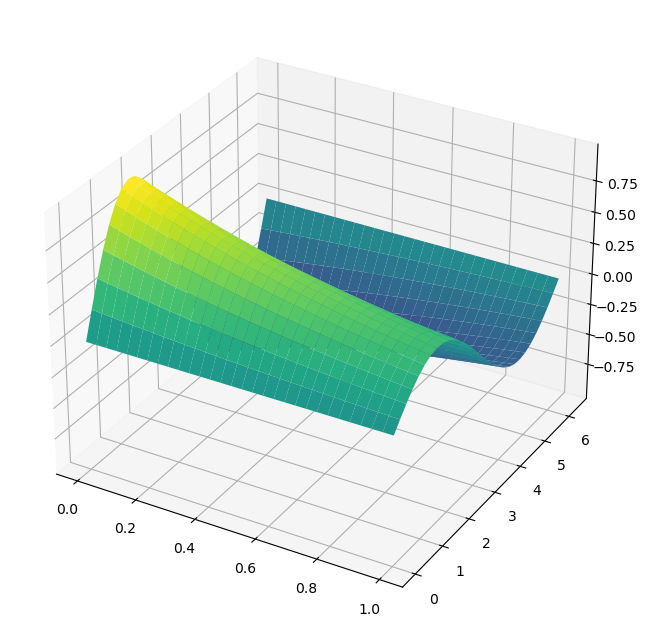

In [6]:
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(T, X, U, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')


In [29]:
def Zeydeli_Iteration_To_Heat_Equation(n_x,n_t):
    t = np.linspace(0,1,n_t)
    x = np.linspace(0,2*np.pi,n_x)
    T,X = np.meshgrid(t,x)
    U = f(T,X)
    U[1:,1:-1]=0
    Itr = 0
    U2 = np.copy(U)
    e = 1
    delta_t = t[1]-t[0]
    delta_x = x[1]-x[0]
    alpha =delta_t/delta_x**2
    while e>1e-5:
#         U2 = np.copy(U)
        for i in range(1,n_x-1):
            for j in range(0,n_t-1):
                # Z[i,j]= (1/4)*(Z[i,j-1] +Z[i,j+1]+Z[i-1,j]+Z[i+1,j])
#                 U[i,j]=(1/(1-2*alpha))*(U[i+1,j]-alpha*(U[i,j+1]+U[i,j-1]))
                U[i,j+1] = U[i,j] + alpha*(U[i+1,j]-2*U[i,j]+U[i-1,j])
              
        Itr+=1
        e = np.linalg.norm(np.ravel(U2-U))
        U2 = np.copy(U)
    return T,X,U,Itr

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
R=Zeydeli_Iteration_To_Heat_Equation(8,12)
R[3]

8

Text(0.5, 0, '$U(T,X)$')

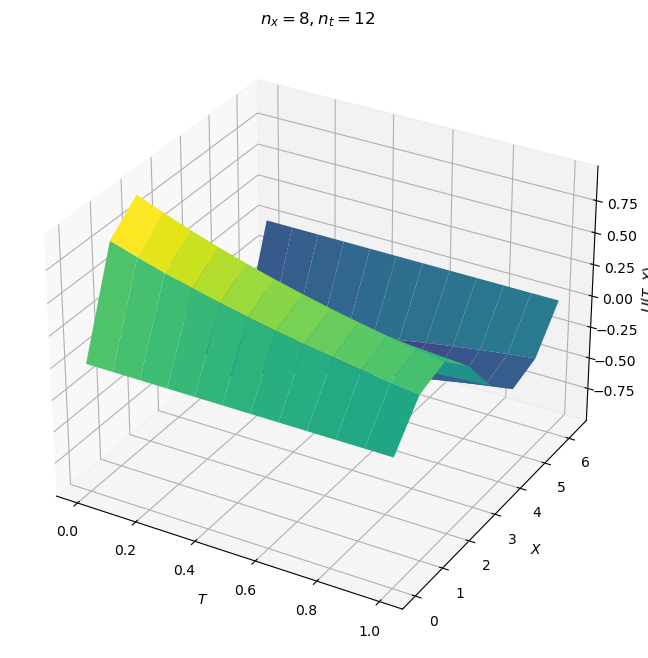

In [10]:
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('$n_x=8 ,n_t = 12  $');
ax.set_xlabel("$T$")
ax.set_ylabel("$X$")
ax.set_zlabel("$U(T,X)$")

In [11]:
R=Zeydeli_Iteration_To_Heat_Equation(12,24)
R[3]

13

Text(0.5, 0, '$U(T,X)$')

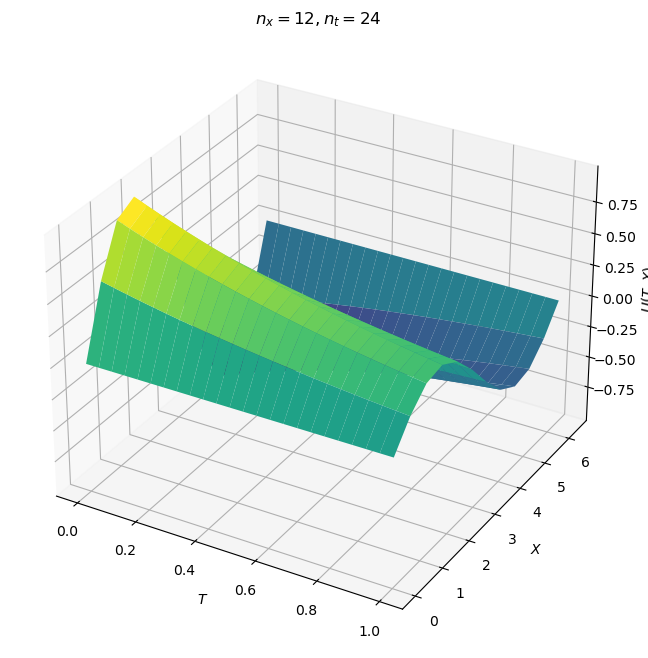

In [12]:
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('$n_x=12 ,n_t = 24  $');
ax.set_xlabel("$T$")
ax.set_ylabel("$X$")
ax.set_zlabel("$U(T,X)$")

In [13]:
R=Zeydeli_Iteration_To_Heat_Equation(40,60)
R[3]

49

Text(0.5, 0, '$U$')

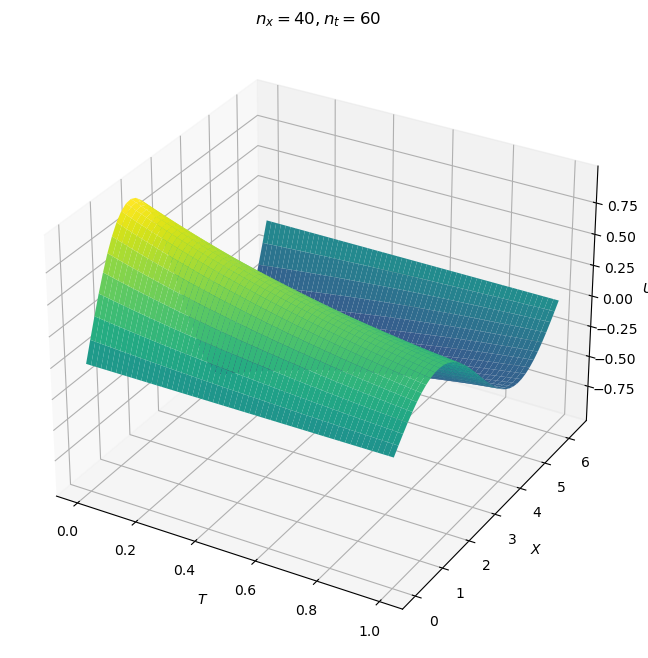

In [14]:
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('$n_x=40 ,n_t = 60  $');
ax.set_xlabel("$T$")
ax.set_ylabel("$X$")
ax.set_zlabel("$U$")

In [15]:
N_x = [6,12,24,36,40]
N_t = [10,20,30,40,60]
E = np.zeros(len(N_x))
for n in range(len(N_x)):
    R=Zeydeli_Iteration_To_Heat_Equation(N_x[n],N_t[n])
    e = np.linalg.norm(np.ravel(f(R[0],R[1])-R[2]))/len(np.ravel(R[2]))
    E[n] = e

In [16]:
E

array([1.91664154e-03, 1.35020548e-05, 8.17877680e-05, 5.34647342e-05,
       2.57346592e-05])

Text(0, 0.5, '$E$')

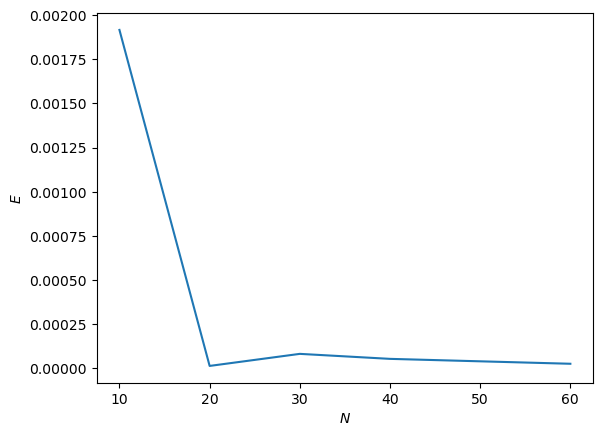

In [17]:
plt.plot(N_t,E)
plt.xlabel("$N$")
plt.ylabel("$E$")

# Метод прогонки

$
\frac{-\tau}{h^2}U_{i-1}^{j+1}+(1+\frac{2\tau}{h^2})U_{i}^{j+1}+\frac{-\tau}{h^2}U_{i+1}^{j+1} = U_{i}^{j}\\
U_{i}^{j} = \alpha_{i+1}^{j}U_{i+1}^{j} + \beta_{i+1}^{j} \space \space \space i=n-1 \dots 1 \\
U_{n}^{j} = \frac{f_{n} - a_n\beta_n}{b_n + a_n\alpha_n} \\
\alpha_{i+1} = \frac{-c_i}{a_i \alpha_i + b_i} \space \space \space \beta_{i+1} = \frac{f_i - a_i\beta_i}{a_i\alpha_i + b_i} \\ \\
\alpha_2 = \frac{-c_1}{b_1} \space \space \beta_2 = \frac{f_1}{b_1}\\
a_i = c_i = \frac{-\tau}{h^2} , \space \space \space \space \space b_i = 1 +\frac{2\tau}{h^2} \\
f_i = U_i^j
$

In [224]:
def progonka(a,b,c_i,f_i):
    n = len(a)
    alpha = [c_i[0] / b[0]]
    beta = [f_i[0] / b[0]]
    for i in range(1,n):
        alpha_i = -c_i[i] / (b[i] + a[i] * alpha[i - 1])
        alpha.append(alpha_i)
        beta_i = (f_i[i] - a[i] * beta[i - 1]) / (b[i] + a[i] * alpha[i - 1])
        beta.append(beta_i)
    u = []
    u.append(beta[n - 1])
    for i in range(1, n):
        u_i = beta[n - 1 - i] + alpha[n - 1 - i] * u[i - 1]
        u.append(u_i)
    u.reverse()
    
    return np.array(u)

def solution_heat_equation_method_progonk(n_x,n_t):
    t = np.linspace(0,1,n_t)
    x = np.linspace(0,2*np.pi,n_x)
    T,X = np.meshgrid(x,t)
    U = np.zeros((n_t,n_x))
    U[0] = np.sin(x)
    tau = t[1]-t[0]
    h = x[1] -x[0]
    for i in range(n_t):
        A = np.zeros(n_x)
        A[1:] = -tau / h ** 2
        B = np.zeros(n_x) + 2 * tau / h ** 2 + 1
        C = np.zeros(n_x)
        C[1:] = -tau / h ** 2
        F_i = U[i]
        res = progonka(A, B, C, F_i)
        if i != len(t) - 1:
            U[i + 1] = res
    return X,T,U

Text(0.5, 0, 'u')

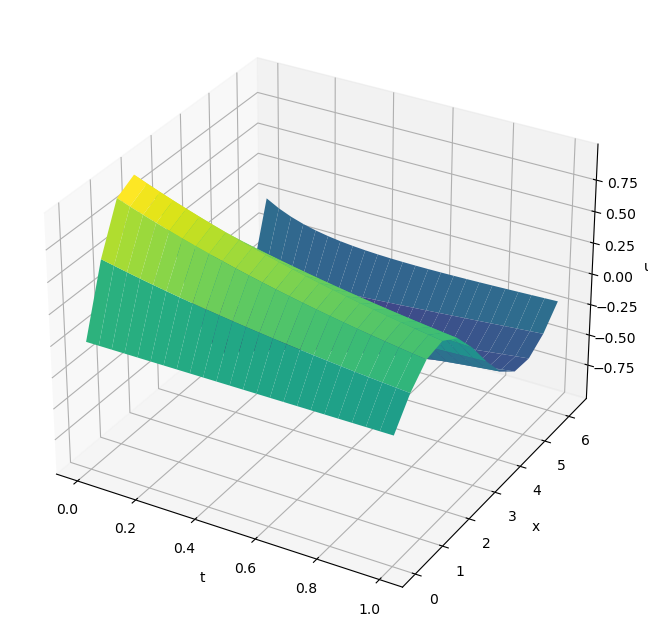

In [225]:
R=solution_heat_equation_method_progonk(12,24)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')

Text(0.5, 0, 'u')

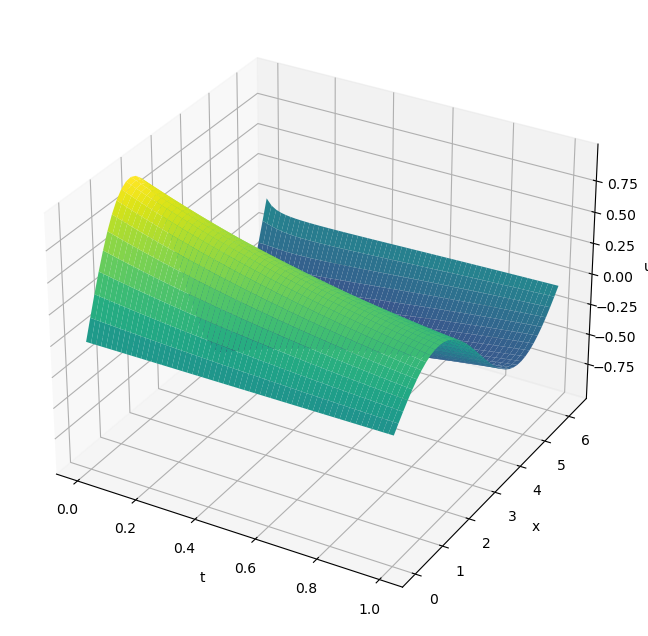

In [226]:
R=solution_heat_equation_method_progonk(40,60)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')

In [27]:
N_x = [6,12,24,36,40,60,80,100]
N_t = [10,20,30,40,60,120,160,200]
E = np.zeros(len(N_x))
for n in range(len(N_x)):
    R=solution_heat_equation_method_progonk(N_x[n],N_t[n])
    e = np.linalg.norm(np.ravel(f(R[1],R[0])-R[2]))/len(np.ravel(R[2]))
    E[n] = e

In [28]:
E

array([0.06358562, 0.03037953, 0.01717446, 0.0120343 , 0.00928215,
       0.0053206 , 0.00397855, 0.00317701])

Text(0, 0.5, '$E$')

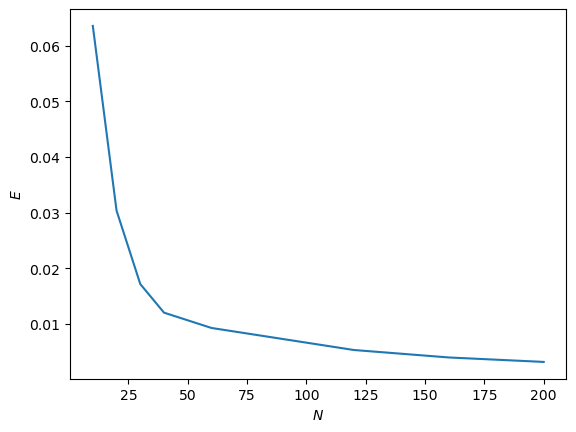

In [29]:
plt.plot(N_t,E)
plt.xlabel("$N$")
plt.ylabel("$E$")

<img src="image_1.jpeg" alt="Alternative text" />

In [490]:
def Zeydeli_Iteration_To_Heat_Equation_With_Increased_Accuracy(n_x,n_t):
    t = np.linspace(0,1,n_t)
    x = np.linspace(0,2 * np.pi,n_x)
    T,X = np.meshgrid(t,x)
    U = f(T,X)
    U[1:,1:]=0
    Itr = 0
    # U2 = np.copy(U)
    e = 1
    delta_t = t[1]-t[0]
    delta_x = x[1]-x[0]
    alpha = delta_t/delta_x**2
    print(U.shape)
    while e>1e-3:
        U2 = np.copy(U)
        for j in range(0,n_t-1):
            for i in range(1,n_x-1):
                if j ==0 :
                    U[i,j+1] = U[i,j] +alpha*(U[i+1,j]-2*U[i,j]+U[i-1,j])
                else:
                    operator = (U[i+1,j+1] - 2*U[i,j+1] + U[i-1,j+1])/delta_x**2
                    U[i,j+1] = U[i,j] + (U[i,j] - U[i,j-1])/3 + 2*delta_t*operator/3 
              
        Itr+=1
        e = np.linalg.norm(np.ravel(U2-U))
    return T,X,U,Itr

(12, 24)


Text(0.5, 0, 'u')

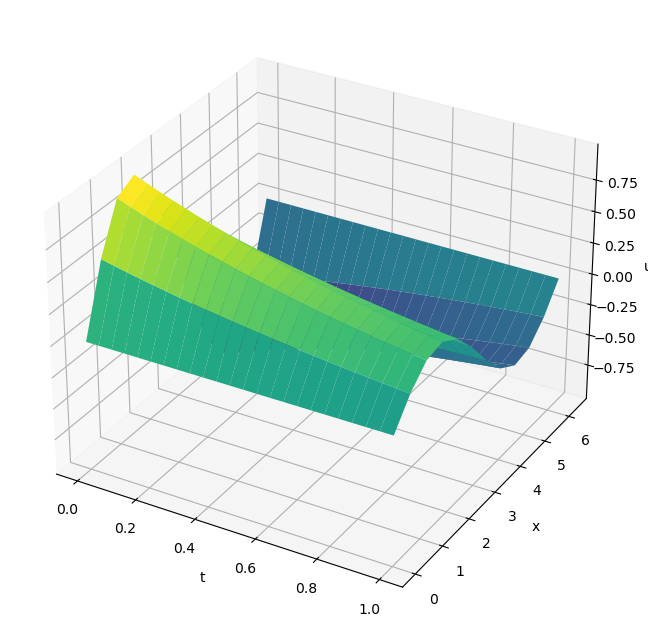

In [491]:
R=Zeydeli_Iteration_To_Heat_Equation_With_Increased_Accuracy(12,24)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')

(24, 48)


Text(0.5, 0, 'u')

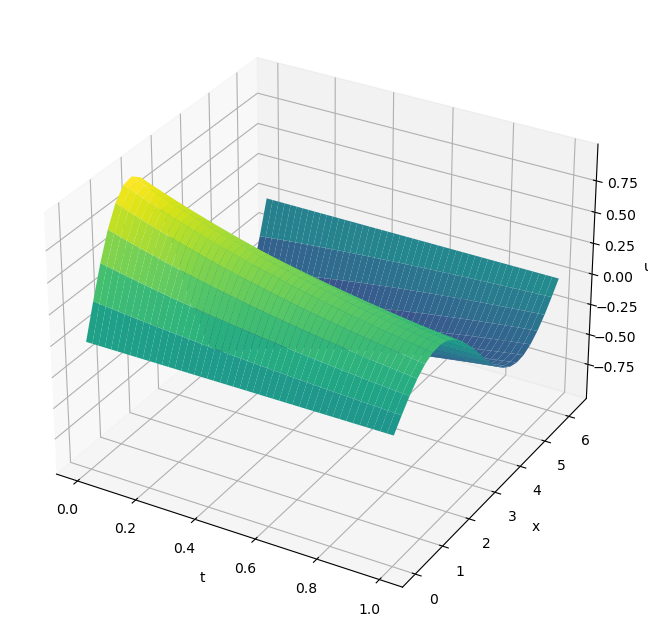

In [492]:
R=Zeydeli_Iteration_To_Heat_Equation_With_Increased_Accuracy(24,48)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')

(6, 10)
(12, 20)
(20, 30)
(24, 38)


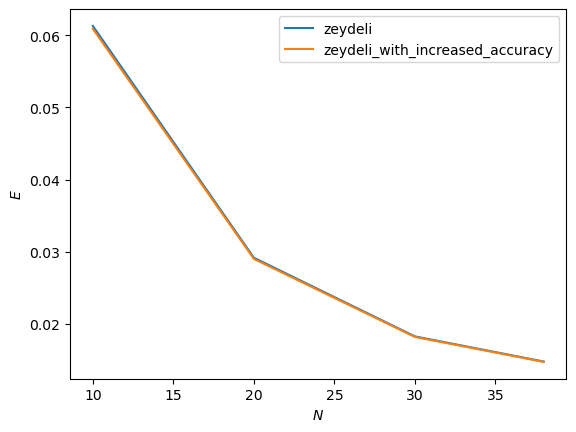

In [493]:
N_x = [6,12,20,24]
N_t = [10,20,30,38]
E = np.zeros(len(N_x))
E2 = np.zeros(len(N_x))
for n in range(len(N_x)):
    R=Zeydeli_Iteration_To_Heat_Equation_With_Increased_Accuracy(N_x[n],N_t[n])
    R2=Zeydeli_Iteration_To_Heat_Equation(N_x[n],N_t[n])
    e = np.linalg.norm(np.ravel(f(R[1],R[0])-R[2]))/len(np.ravel(R[2]))
    e2 = np.linalg.norm(np.ravel(f(R2[1],R2[0])-R2[2]))/len(np.ravel(R2[2]))
    E[n] = e
    E2[n] = e2
    

plt.plot(N_t,E)
plt.plot(N_t,E2)
plt.xlabel("$N$")
plt.ylabel("$E$")
plt.legend(["zeydeli","zeydeli_with_increased_accuracy"])

In [494]:
E

array([0.06129749, 0.0291858 , 0.01829404, 0.01481048])

In [467]:
def progonka(a,b,c_i,f_i):
    n = len(a)
    alpha = np.zeros(n)
    beta = np.zeros(n)
    alpha[0] = c_i[0] / b[0]
    beta[0] = f_i[0] / b[0]
    for i in range(1,n):
        alpha_i = -c_i[i] / (b[i] + a[i] * alpha[i - 1])
        alpha[i] = alpha_i
        beta_i = (f_i[i] - a[i] * beta[i - 1]) / (b[i] + a[i] * alpha[i - 1])
        beta[i] = beta_i
    u = np.zeros(n)
    u[0] = beta[n - 1]
    for i in range(0, n):
        u_i = beta[n - 1 - i] + alpha[n - 1 - i] * u[i - 1]
        u[i] = u_i
        
    return u[::-1]

def solution_heat_equation_With_Increased_Accuracy_method_progonk(n_x,n_t):
    t = np.linspace(0,1,n_t)
    x = np.linspace(0,2*np.pi,n_x)
    T,X = np.meshgrid(x,t)
    U = np.zeros((n_t,n_x))
    print(U.shape)
    U[0] = np.sin(x)
    tau = t[1]-t[0]
    h = x[1] -x[0]
    for i in range(n_t-1):
        A = np.zeros(n_x)
        if i==0:
            A[1:] = -2*tau / 3*h ** 2
            B = np.zeros(n_x) + 4 * tau / 3*h ** 2 + 1
            C = np.zeros(n_x)
            C[1:] = -2*tau / 3*h ** 2
            F_i = U[i]*2.2/3
        else:
            A[1:] = -2*tau / 3*h ** 2
            B = np.zeros(n_x) + 4 * tau / 3*h ** 2 + 1
            C = np.zeros(n_x)
            C[1:] = -2*tau / 3*h ** 2
            F_i = U[i] + (U[i]-U[i-1])/3
        res = progonka(A, B, C, F_i)
#         if i != len(t) - 1:
        U[i + 1] = res
    return X,T,U

(24, 12)


Text(0.5, 0, 'u')

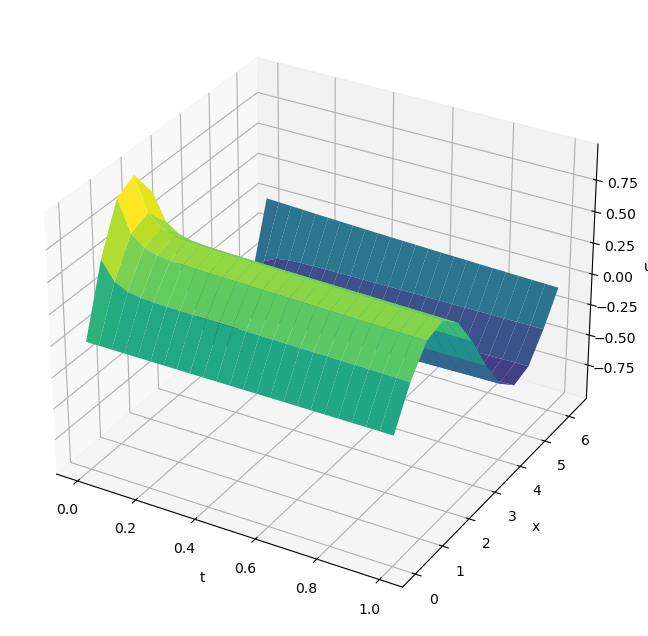

In [468]:
R=solution_heat_equation_With_Increased_Accuracy_method_progonk(12,24)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')

(40, 20)


Text(0.5, 0, 'u')

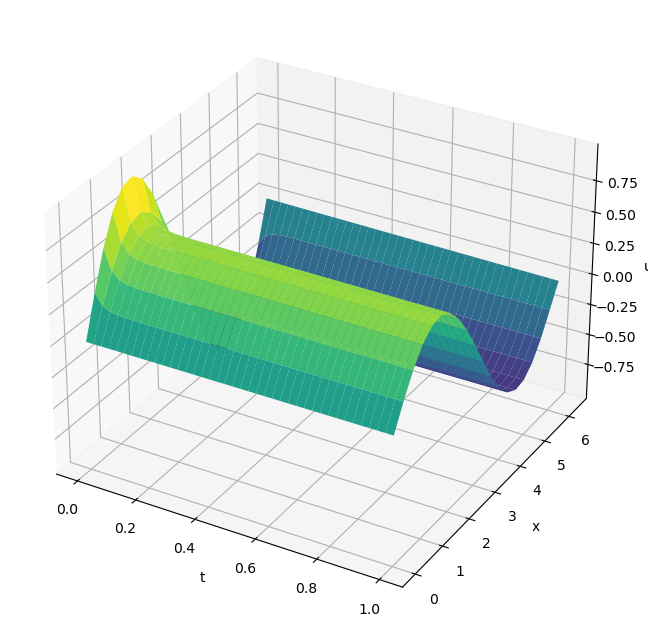

In [471]:
R=solution_heat_equation_With_Increased_Accuracy_method_progonk(20,40)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')

(10, 6)
(20, 12)
(30, 24)
(40, 36)
(60, 40)
(120, 60)
(160, 80)
(200, 100)
(400, 200)


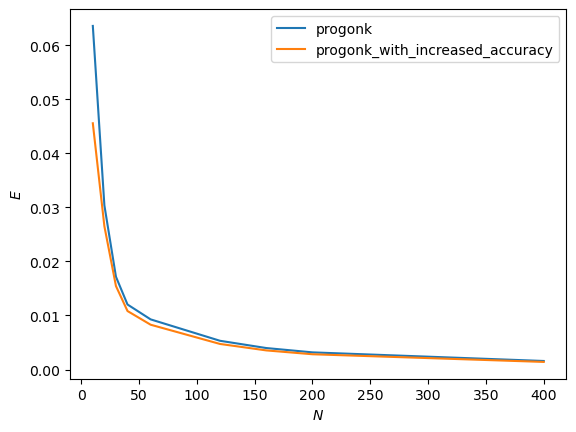

In [472]:
N_x = [6,12,24,36,40,60,80,100,200]
N_t = [10,20,30,40,60,120,160,200,400]
E = np.zeros(len(N_x))
E2 = np.zeros(len(N_x))
for n in range(len(N_x)):
    R=solution_heat_equation_method_progonk(N_x[n],N_t[n])
    R2=solution_heat_equation_With_Increased_Accuracy_method_progonk(N_x[n],N_t[n])
    e = np.linalg.norm(np.ravel(f(R[1],R[0])-R[2]))/len(np.ravel(R[2]))
    e2 = np.linalg.norm(np.ravel(f(R2[1],R2[0])-R2[2]))/len(np.ravel(R2[2]))
    E[n] = e
    E2[n] = e2

plt.plot(N_t,E)
plt.plot(N_t,E2)
plt.xlabel("$N$")
plt.ylabel("$E$")
plt.legend(["progonk","progonk_with_increased_accuracy"])

<img src="image_2.jpeg" alt="Alternative text" />

In [473]:
f = lambda t,x: np.sqrt(t-x) if x<=t else 0

def F (T,X):
    n = T.shape[0]
    m = T.shape[1]
    u = np.zeros((n,m))
    for i in range(n) :
        for j in range(m):
            u[i,j] = f(T[i,j],X[i,j])
    return  u

In [474]:
x = np.linspace(0,12,30)
t = np.linspace(0,8,30)

In [475]:
T,X = np.meshgrid(t,x)
U = F(T,X)

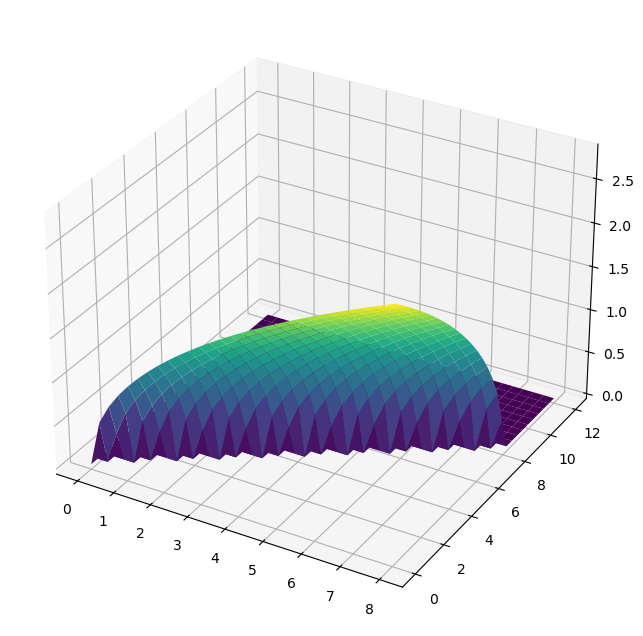

In [476]:
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(T, X, U, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

In [477]:
def Zeydeli_Iteration_To_Heat_Equation_with_weights(n_x,n_t):
    t = np.linspace(0,4,n_t)
    x = np.linspace(0,12,n_x)
    T,X = np.meshgrid(t,x)
    U = F(T,X)
    U[1:,1:]=0
    Itr = 0
    # U2 = np.copy(U)
    e = 1
    delta_t = t[1]-t[0]
    delta_x = x[1]-x[0]
    alpha =delta_t/delta_x**2
    sigma = (0.5 - delta_x**2/12*delta_t)/2
    while e>1e-5:
        U2 = np.copy(U)
        for j in range(0,n_t-1):
            for i in range(1,n_x-1):
                _k = np.abs(U[i-1,j])/2
                k = np.abs(U[i,j])/2
                k_ = np.abs(U[i+1,j])/2
                k_minus_half = (k+_k)/2
                k_plus_half = (k+k_)/2
                operator_1 = (k_plus_half*(U[i+1,j]-U[i,j])-k_minus_half*(U[i,j]-U[i-1,j]))/delta_x**2
                _k = np.abs(U[i-1,j+1])/2
                k = np.abs(U[i,j+1])/2
                k_ = np.abs(U[i+1,j+1])/2
                k_minus_half = (k+_k)/2
                k_plus_half = (k+k_)/2
                operator_2 = (k_plus_half*(U[i+1,j+1]-U[i,j+1])-k_minus_half*(U[i,j+1]-U[i-1,j+1]))/delta_x**2

                U[i,j+1] = U[i,j] + delta_t*(sigma*operator_2 + (1-sigma)*operator_1)
        Itr+=1
        e = np.linalg.norm(np.ravel(U2-U))
    return T,X,U,Itr

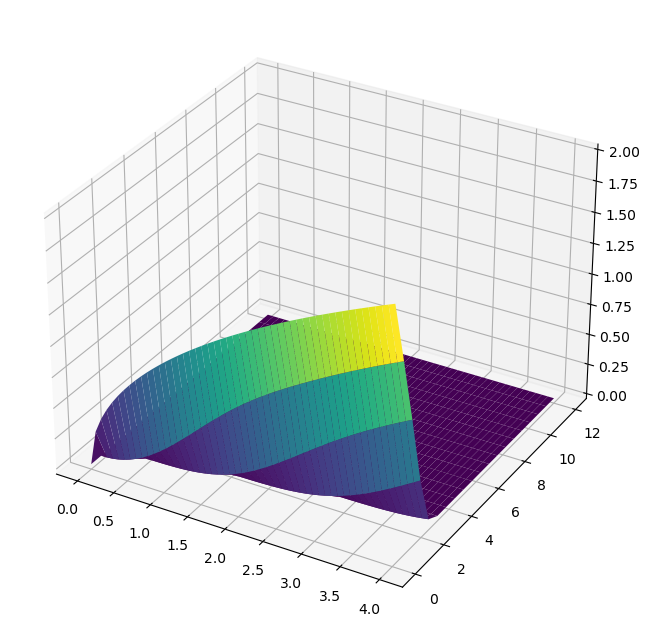

In [478]:
R=Zeydeli_Iteration_To_Heat_Equation_with_weights(20,50)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,cmap='viridis', edgecolor='none')

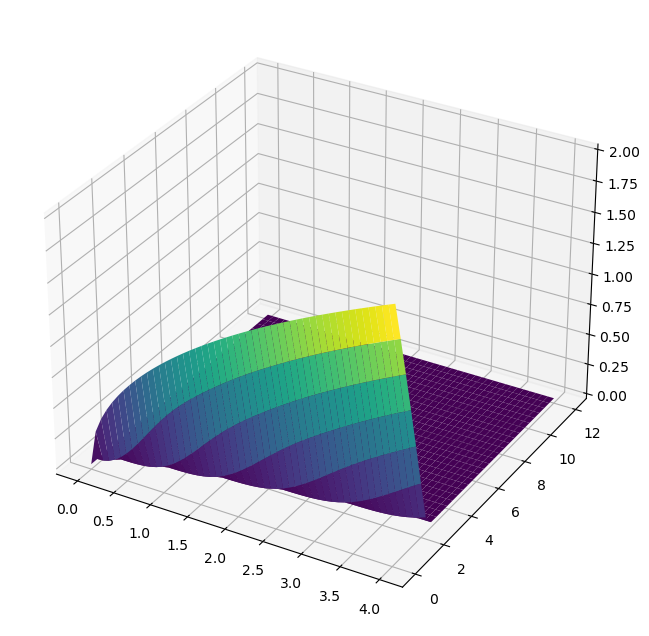

In [479]:
R=Zeydeli_Iteration_To_Heat_Equation_with_weights(32,50)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(R[0], R[1], R[2], rstride=1, cstride=1,cmap='viridis', edgecolor='none')

Text(0, 0.5, '$E$')

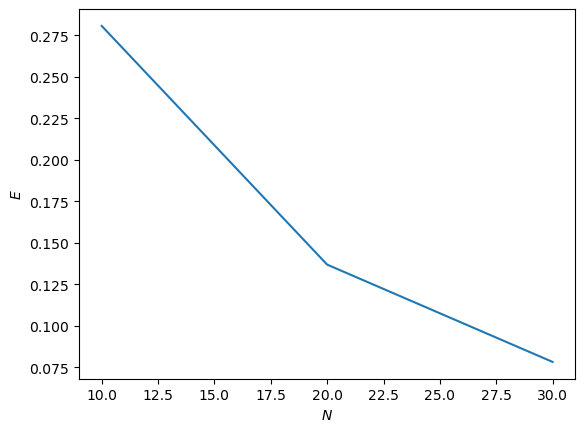

In [482]:
N_x = [6,12,24]
N_t = [10,20,30]
E = np.zeros(len(N_x))
for n in range(len(N_x)):
    R=Zeydeli_Iteration_To_Heat_Equation_with_weights(N_x[n],N_t[n])
    e = np.linalg.norm(np.ravel(F(R[1],R[0])-R[2]))/len(np.ravel(R[2]))
    E[n] = e
plt.plot(N_t,E)
plt.xlabel("$N$")
plt.ylabel("$E$")